# Support Vector Machines with Extended Dataset
## 0.01 Mass Units inlcuding 2+ Masses

In [7]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import svm
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

In [8]:
#insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/bin_size_0.01/")

#changes current working directory to the path given 
directory = os.chdir(path)

In [9]:
#load data 
load_data = np.load('all_train_data_0.01_with_2+.npy', allow_pickle=True)
df = pd.DataFrame(load_data)

# Create feature and target arrays
X = df.drop(101300, axis=1) 
y = df[101300].astype('int') #last column is the modified or not modified feature

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4 , random_state=42)

In [10]:
# Create classifier
svc = svm.SVC()

# Fit the classifier to the training data
svc.fit(X_train, y_train)

# Print the accuracy
print(svc.score(X_test, y_test))

0.9473684210526315


In [5]:
print("Test set predictions: {}".format(svc.predict(X_test)))
print("Test set accuracy: {:.2f}".format(svc.score(X_test, y_test)))

Test set predictions: [0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1]
Test set accuracy: 0.95


In [6]:
#fit classifier
svc.fit(X_train, y_train)

#predict using the X_test data
y_pred_rf = svc.predict(X_test)

#build dataframe to house the scores.
df = pd.DataFrame()

#name columns
cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy']

#name required cells 
df.loc['Machine Learning Classification Method', 
       'Details'] = 'Support Vector Machines'

#fit classifier onto both datasets to compare 
df.loc['Train Accuracy', 'Details'] = svc.score(X_train, y_train) 
df.loc['Test Accuracy', 'Details'] = svc.score(X_test, y_test)
print(df)

                                                        Details
Machine Learning Classification Method  Support Vector Machines
Train Accuracy                                         0.962963
Test Accuracy                                          0.947368


Interestingly, accuracy using the extended data set increases and the discrepency between the training and test set accuracies decreases. 

In [11]:
#metrics for classification
# Fit the classifier to the training data
svc.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = svc.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0]
 [ 1  8]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.89      0.94         9

    accuracy                           0.95        19
   macro avg       0.95      0.94      0.95        19
weighted avg       0.95      0.95      0.95        19



In [44]:
#setup the hyperparameter grid
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              }

#instantiate the GridSearchCV object: logreg_cv
svc_cv = GridSearchCV(svc, param_grid, cv=5)

# Fit to the training set
svc_cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = svc_cv.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0]
 [ 9  0]]
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       0.00      0.00      0.00         9

    accuracy                           0.53        19
   macro avg       0.26      0.50      0.34        19
weighted avg       0.28      0.53      0.36        19



/Users/LeandroJumilla/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVMs are very sensitive to the settings of the parameters and to the scaling of the data. In particular, they require all the features to vary on a similar scale. To resolve this problem, rescaling each feature so that they are all approximately on the same scale is a solution.

Scaling and centering can also be done within a pipeline to make this process quicker. MinMaxScaler preprocessing method can be used instead of using the manual method above. 

In [5]:
#scaling and centering in pipline 
#import the necessary modules
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline

## MinMaxScaler

In [46]:
#setup the pipeline steps: steps
steps = [('scaler', MinMaxScaler()),
        ('SVM', svm.SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the pipeline to the training set: knn_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
svc_unscaled = svc.fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.5263157894736842
Accuracy without Scaling: 0.9473684210526315


As can be seen with this extended dataset, unlike the dataset including only 1+ masses, scaling significantly and negatively affects the dataset accuracy when including 2+ masses and is something to consider when building models. 

Now we can see if there is a difference using the standard scaler in a pipeline.

## StandardScaler

In [11]:
#setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', svm.SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the pipeline to the training set: knn_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
svc_unscaled = svc.fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.5263157894736842
Accuracy without Scaling: 0.9473684210526315


Once again it does not matter which scaler is used, the same results are produced. 
We can now carry out hyperparameter tuning with and without scaling to see the results. 
## Hyperparameter tuning with scaling

In [53]:
#Pipeline for classification
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', svm.SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[0.1, 1, 10, 100, 1000],
              'SVM__gamma':[1, 0.1, 0.01, 0.001, 0.0001],
              'SVM__kernel': ['rbf']}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.5263157894736842
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       0.00      0.00      0.00         9

    accuracy                           0.53        19
   macro avg       0.26      0.50      0.34        19
weighted avg       0.28      0.53      0.36        19

Tuned Model Parameters: {'SVM__C': 0.1, 'SVM__gamma': 1, 'SVM__kernel': 'rbf'}


/Users/LeandroJumilla/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we can see, scaling directly affects the modified peptides, getting no correct predictions.
## Hyperparameter tuning without scaling

It seems without scaling the GridsearchCV takes, computationally, much longer to process when considering a larger range of parameter space

In [12]:
#Pipeline for classification
# Setup the pipeline
steps = [('SVM', svm.SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[0.1, 1, 10, 100, 1000],
              'SVM__gamma':[1, 0.1, 0.01, 0.001, 0.0001],
              'SVM__kernel': ['rbf']}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.5263157894736842
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       0.00      0.00      0.00         9

    accuracy                           0.53        19
   macro avg       0.26      0.50      0.34        19
weighted avg       0.28      0.53      0.36        19

Tuned Model Parameters: {'SVM__C': 0.1, 'SVM__gamma': 1, 'SVM__kernel': 'rbf'}


/Users/LeandroJumilla/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## PCA 

In [15]:
from sklearn.decomposition import PCA

In [ ]:
#build the pipeline
pipe = Pipeline([
        ('reducer', PCA(n_components=15)),
        ('classifier',svm.SVC())])

#fit the pipeline to the training data
pipe.fit(X_train, y_train)

#score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

#prints the explained variance ratio and accuracy
print('{0:.1%} test set accuracy'.format(accuracy))

In [26]:
print(pipe.steps[1][1].explained_variance_ratio_)

[0.27512629 0.09226276 0.07788127 0.05766278 0.05351533 0.04992562
 0.04754853 0.04384599 0.04052781 0.03877501 0.03730112 0.0309969
 0.02703635 0.02537425 0.01709722 0.01563782 0.01492213 0.01394321
 0.01213941 0.01030336 0.00730817 0.00341753 0.00282107]


Performs better with PC compared to the other models using PC.

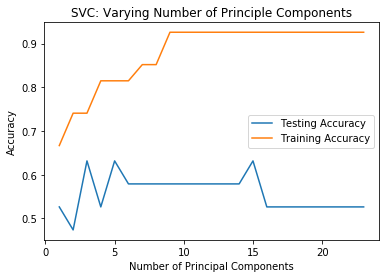

In [25]:
# Setup arrays to store train and test accuracies
n_components = np.arange(1, 24)
train_accuracy = np.empty(len(n_components))
test_accuracy = np.empty(len(n_components))

# Loop over different values of k
for i, k in enumerate(n_components):
    
    #setup a pipeline with a k-NN Classifier with k neighbors: knn
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=k)),
        ('classifier', svm.SVC())])

    #fit the pipeline to to the training data
    pipe.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = pipe.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = pipe.score(X_test, y_test)

# Generate plot
plt.title('SVC: Varying Number of Principle Components')
plt.plot(n_components, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_components, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()

## PCA without Scaling

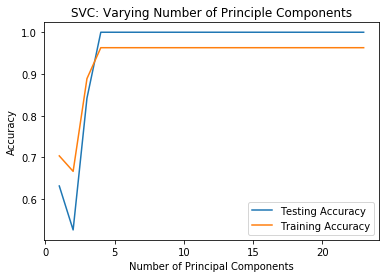

In [16]:
# Setup arrays to store train and test accuracies
n_components = np.arange(1, 24)
train_accuracy = np.empty(len(n_components))
test_accuracy = np.empty(len(n_components))

# Loop over different values of k
for i, k in enumerate(n_components):
    
    #setup a pipeline with a k-NN Classifier with k neighbors: knn
    pipe = Pipeline([
        ('reducer', PCA(n_components=k)),
        ('classifier', svm.SVC())])

    #fit the pipeline to to the training data
    pipe.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = pipe.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = pipe.score(X_test, y_test)

# Generate plot
plt.title('SVC: Varying Number of Principle Components')
plt.plot(n_components, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_components, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()

Performs much better without scaling the data first. 

## Hold-out Set
SVM (1+ & 2+ masses) lowest optimum number of PCs with Scaling: 15
SVM (1+ & 2+ masses) lowest optimum number of PCs without Scaling: 4

Note that SVM are very senstive to scaling and thus the disparity between PCs

In [17]:
#insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/combined_hold_out/")

#changes current working directory to the path given 
directory = os.chdir(path)

#load data 
hold_out_data = np.load('combined_hold_out_test.npy', allow_pickle=True)
hold_out_df = pd.DataFrame(hold_out_data)

# Create feature and target arrays
X_hold_out = hold_out_df.drop(101300, axis=1) 
y_hold_out = hold_out_df[101300].astype('int') #last column is the modified or not modified feature

In [18]:
#create variables for number of each principal components
scaled_PC = 15
unscaled_PC = 4

#setup the pipeline with scaler
pipe_1 = Pipeline([('scaler', StandardScaler()),
                    ('reducer', PCA(scaled_PC)),
                    ('SVC', svm.SVC())])
        
#create second pipeline with no scaler
pipe_2 = Pipeline([('reducer', PCA(unscaled_PC)),
                    ('SVC', svm.SVC())])

#fit the pipeline to the whole data set; hold out set acts as test set 
knn_pca_scaled = pipe_1.fit(X, y)

#fit the seoncd pipeline to the whole data set. 
knn_pca_unscaled = pipe_2.fit(X, y)

# Compute and print metrics
print('Hold-out Set Accuracy with Scaling: {}'.format(knn_pca_scaled.score(X_hold_out, y_hold_out)))
print('Hold-out Set Accuracy without Scaling: {}'.format(knn_pca_unscaled.score(X_hold_out, y_hold_out)))

Hold-out Set Accuracy with Scaling: 0.38461538461538464
Hold-out Set Accuracy without Scaling: 1.0
